<a href="https://colab.research.google.com/github/itsmeaby/Machine-Learning/blob/main/Pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

Let's explore an example PyTorch end-to-end workflow.

In [2]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (infrence)",
                      5: "save and load model",
                      6: "putting it all together"}

In [3]:
import torch
from torch import nn   # nn contains all of PyTorch's building block for neural network
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu118'

## Data (preparing and loading)

Data can be almost anything ..  in machine learning

* Excel spreadsheet
* Images of any kind
* Videos ( YT has lots of data )
* Audio
* DNA
* Text

Machine learning is a game of two parts:
1. get data into a numbercial representation.
2. Build a model to learn patterns in thet numerical representation.

we'll use a linear regression formula to make a straight line with known **parameters**.

In [4]:
# Create *Known* parameters

weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias   # y = mx + c

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

## spliting data into training and test sets

**Generalization**: the ability for a ML model to perform well on data it hasn't seen before.

Let's create training and test set with our data.

In [5]:
# Create a train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]

len(X_train), len(y_train) , len(X_test), len(y_test)

(40, 40, 10, 10)

## How might we better visualize our data?

This is where the data explorer's motto comes in!

In [6]:
def plot_predictions(train_data =X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  """
  Plots traing data, test data and comprass predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

  #plot test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="Test data")

  # Are there prdictions
  if predictions is not None:
    #plot the predictions if tghey exist
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")

  # Show the legend
  plt.legend(prop={"size":14});


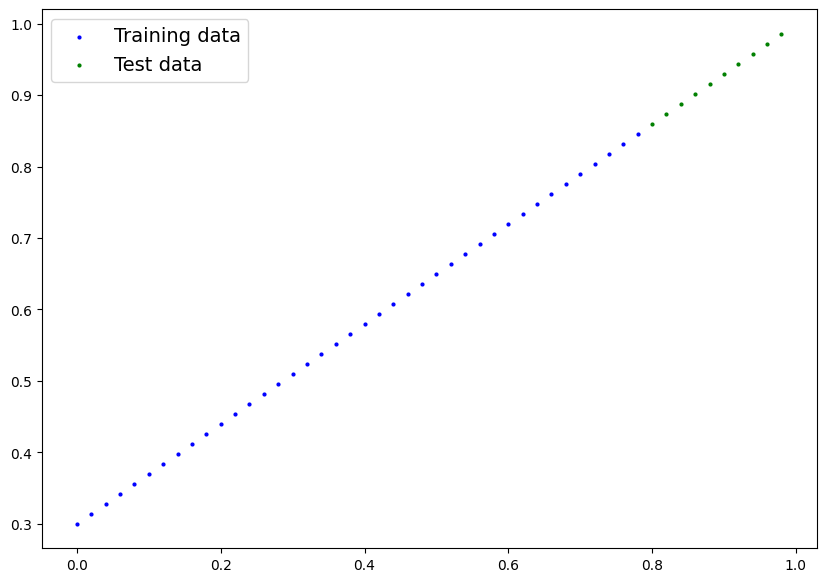

In [7]:
plot_predictions()

## Build model

Our first model in PyTorch!

python classes: https://realpython.com/python-classes/

what our model does:
* Start with andom values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithems:
1. Gradient descent
2. Backpropogation

In [8]:
from torch import nn

# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (this containes all the building blocks for neural networks)
    def __init__(self):
        super().__init__()

        # Initialize model parameters
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # forward() -> This defines the forward computation of the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

## PyTorch model building essentials

* torch.nn  ->  contain all of the building blocks of computational graph ( neural network can be considered as a computetional graph).
* torch.nn.Parameter -> what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us.
* torch.nn.Module  -> The base class for all neural networks modules, if you subclass it, you should overwrite forward().
* torch.optim  -> this is where the optimizer in PyTorch live, they will help with gradient descent.
* def forward()  ->  All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation.

* torch.utils.data.Dataset
* torch.utils.data.Dataloader
* torchvision.transforms
* torchvision.models -> pretrained vision models
* torch.matrix

**pyTorch cheetshit**: https://pytorch.org/tutorials/beginner/ptcheat.html

## Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's indside our model using `.parameters()`.

In [9]:
# Create a random seed
torch.manual_seed(42)

#Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

#Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.
when we pass data through our model, it's going to run through the `forward()` method.

* see more on inference mode here ->  https://twitter.com/PyTorch/status/1437838231505096708

In [11]:
y_pred = model_0(X_test)
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [12]:
# Make predictions with model
with torch.inference_mode():
  y_pred = model_0(X_test)

y_pred

## You can also do something similar with torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)
#y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [13]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

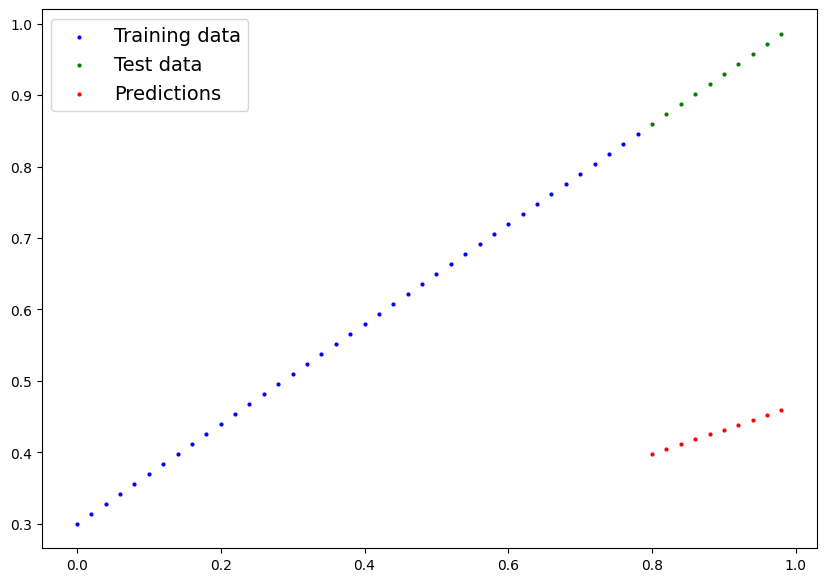

In [14]:
plot_predictions(predictions=y_pred)

## Train model

the whole idea for a model to move from some *unknown* parameters (these may be random) to some known parameters.
Or in ither words a poor representation of the data to a better representation of the data.

one way to measure how poor or how wrong your models predictions are is to use a loss function.

* **Note:** Loss function may also be called cost function or criterion in diffrent areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function:** A function to measure how wrong model's predictions are to the ideal outputs, lower is better.
* **optimizer:** Takes into acciunt the loss of a model and adjust the model's parameters (e.g. weight & bias in our case) to improve the loss function - https://pytorch.org/docs/stable/optim.html
  * inside the optimizer you'll often have to set two parameters:
  
    * `params` - the model parameters you'd like to optimize, for example `params=model_0.parameters()`
    * `lr` (learning rate) - the learning rate is a hyperparameter that after defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes)

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [15]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
# Check out our model parameters (a parameter is a value the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [17]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate  -> possibaly the most important hyperparameter


**Q:** Which loss function and optimizer should I use ?

**A:** This will be problm specific. But with experience, you'll get an idea of what works and what doesn't with your particular

For examle, for a regression prblem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classification whether a photo os of dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss)

## Building a training loop (and a testing loop) in pytorch

A couple of things we need in a training loop:

0. loop through the data and do..
1. Forward pass (this involves data moving through our model's `froward()` functions) to make predictions on data - also called **forward propogation**
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss forward - move backwards throgh network to calculate the gradients of each of the parameters of our model with respect to the loss - also called (**backpropogation**)
5. optimizer step - use the optimizer adjust our model's parameters to try and improve he loss. - also called (**gradient descent**)

In [18]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [19]:
torch.manual_seed(42)
# An epoch is one loop throgh the data... (this is a hyperparameter)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop throgh the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # Train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1.Forward pass
  y_pred = model_0(X_train)

  # 2.Calculate the loss
  loss = loss_fn(y_pred, y_train)
  #print(f"Loss: {loss}")

  # 3.Optimizer zero grad
  optimizer.zero_grad()

  # 4.Perform backpropogation on the loss with respect to the parameters of the model
  loss.backward()

  # 5.setp the optimizer (perform gradient descent)
  optimizer.step() # by default changes will accumulate throgh the loop so.. we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  # Put the model in evaluation mode
  model_0.eval() # turn off gradient tracking

  with torch.inference_mode():  # this turn off gradient descent tracking & A couple of things behind the scenes
    # 1.Do the forward pass
    test_pred = model_0(X_test)

    # 2.Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happenin'
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    # Print out model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

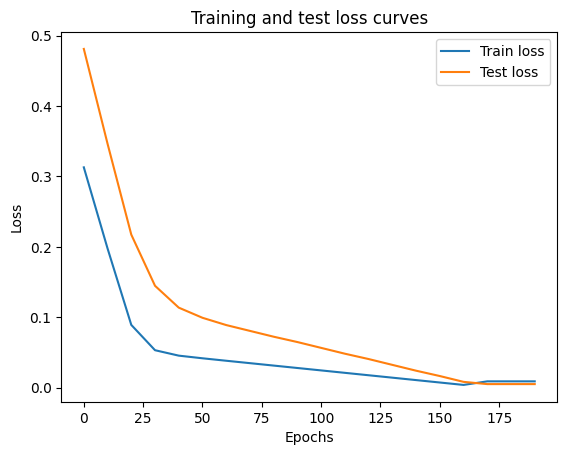

In [20]:
# plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values,label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [21]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)
y_pred_new

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

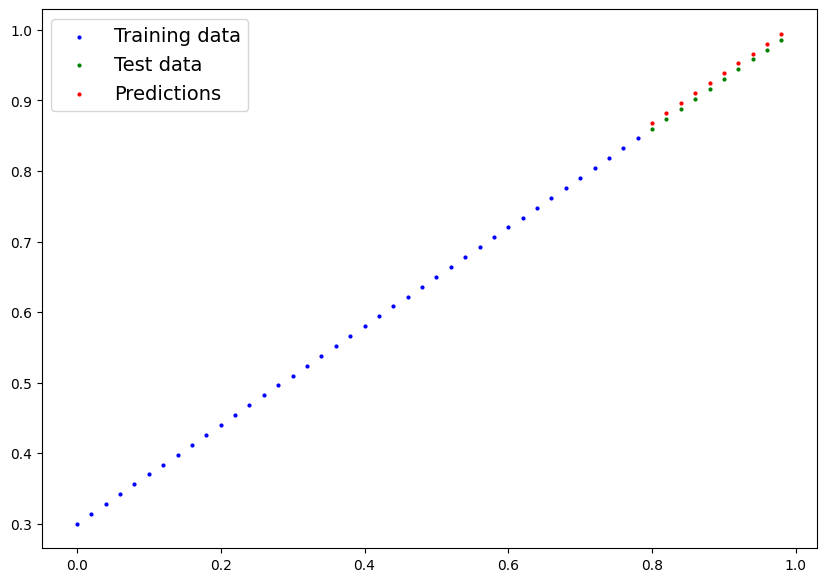

In [23]:
plot_predictions(predictions=y_pred_new)

## Saving a model in PyTorch

There are three main methods you should know about saving andloading a model in PyTorch

1. `torch.save()` - allows you to save PyTorch object in python **pickle** format -> https://docs.python.org/3/library/pickle.html

2. `torch.load()` - allows you load a saved PyTorch object

3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

* PyTorch save & load code -> https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [24]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [25]:
# Saving our PyTorch model
from pathlib import Path

# 1.Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_PyTorch_Workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3.save the model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_PyTorch_Workflow_model_0.pth


In [26]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Dec  9 14:42 01_PyTorch_Workflow_model_0.pth


## Loading a PyTorch model

since we saved our model's `state_dict()` rather then the entire model, we'll create new instancce of our model class and load the saved `state_dict()` into that.

In [27]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [28]:
# To load in a saved state_dict() we have to instentiate a new instnce of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved_dict() of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [29]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [30]:
# Make some predictions with our loaded model
loaded_model_0.eval
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [31]:
# Compare loaded model preds with original model preds
y_pred_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see all in one

In [32]:
# Import Pytorch and matplotlib

import torch
from torch import nn
import matplotlib.pyplot as plt
# check PyTorch version
torch.__version__

'2.1.0+cu118'

# Create device-agnostic code.

this means if we've got access to a gpu, our code will use it (for potentially faster computing).

if no GPU is available, the code will default to using CPU.

In [33]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


## 6.1 Data

In [34]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bais = 0.3

# Create renge values
start = 0
end = 1
step = 0.02

#Create X and y
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bais

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [35]:
# split data into train test
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train) , len(X_test), len(y_test)

(40, 40, 10, 10)

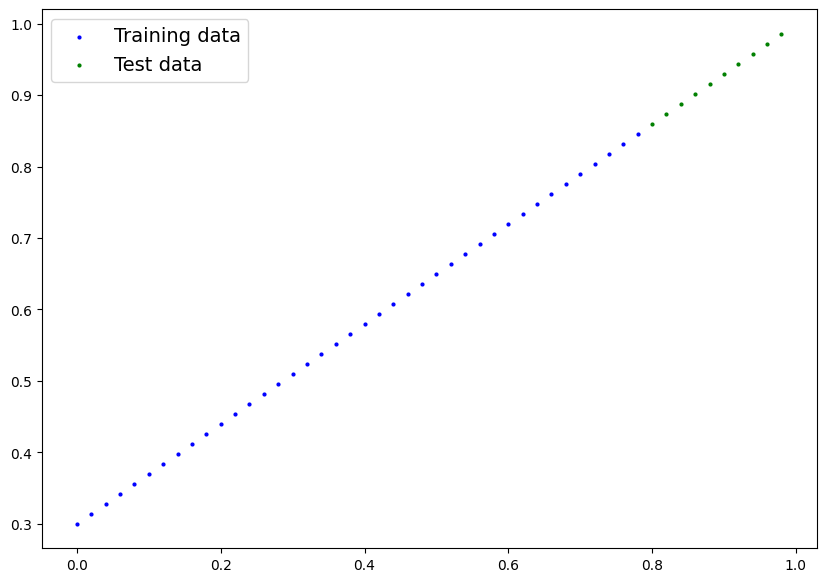

In [36]:
# plot the data
# note: if you don't have plot_prediction() function loaded, this will error
plot_predictions(X_train,y_train,X_test,y_test)

## 6.2 Building a PyTorch Linear Model

In [37]:
# Create a liner model by subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / also called: linear transform, probing layer, fully connected layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  def forward(self,X: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(X)

# Set Manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [38]:
# check model current deive
next(model_1.parameters()).device

device(type='cpu')

In [39]:
# set the model to use target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

## 6.3 Training

For training we need:
* Loss function
* optimizer
* training loop
* testing loop

In [40]:
# setup loss function
loss_fn = nn.L1Loss()  # same as MAE

# setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

# Let's write a training loop
torch.manual_seed(42)
epochs = 200

# Put data on the target device (device agnostic-code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range (epochs):
  # train model
  model_1.train()

  # 1.forward pass
  y_pred = model_1(X_train)

  # 2.calculate loss
  loss = loss_fn(y_pred,y_train)

  # 3.optimizer zero grad
  optimizer.zero_grad()

  # 4.Perform backpropogation
  loss.backward()

  # 5.optimizer step
  optimizer.step()

  ## testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | TestLoss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | TestLoss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | TestLoss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | TestLoss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | TestLoss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | TestLoss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | TestLoss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | TestLoss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | TestLoss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | TestLoss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | TestLoss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | TestLoss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | TestLoss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | TestLoss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | TestLoss: 0.013801801018416882
Epoch: 140

In [41]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [42]:
weight, bias

(0.7, 0.3)

## 6.4 Making and evaluating predictions

In [43]:
# Turn model into evaluateing mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

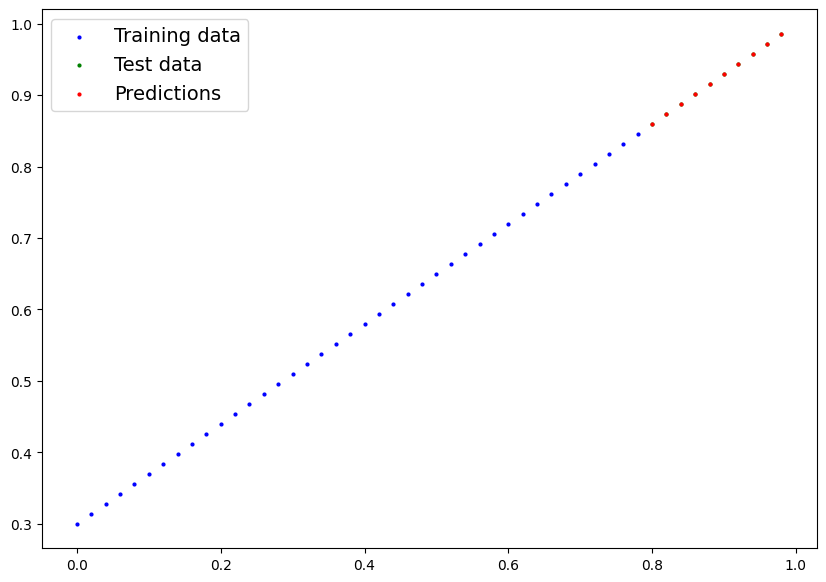

In [44]:
plot_predictions(predictions=y_preds.cpu())

## 6.5 Saving and loading model a trained model

In [45]:
# saving model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [46]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [47]:
# Load a PyTorch model

# Create a new instance of linear regression model v2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 save dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [48]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [49]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [50]:
#Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')